# Day 02- Session1 Recap

  - Dealing with Dates
  - Missing Data Imputation
  - Removing Duplicates
  - Basic Descriptive statitics
  - Outlier Detection
  - Discretize/Bin a Variable in Python
          - Using Pandas (pd.cut)
          -Using Numpy (np.digitize)

#### Dealing with Dates

Practice-1

In [ ]:
# Qn-1 Which sales person achievd the target first  & within how many days he achived the target

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df=pd.read_csv("SALE.CSV")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Target_Start    30 non-null     object
 1   sales_target    30 non-null     int64 
 2   sale_completed  30 non-null     object
 3   Sale_person     30 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [5]:
df

,Target_Start,sales_target,sale_completed,Sale_person
0,2021/January/15,100,2022/January/15,3
1,2021/January/15,100,2022/January/12,11
2,2021/January/15,100,2022/January/12,14
3,2021/January/15,100,30-Jan-22,13
4,2021/January/15,100,2022/February/05,8
5,2021/January/15,100,2022/February/06,27
6,2021/January/15,100,2022/march/12,29
7,2021/January/15,100,2022/March/31,10
8,2021/January/15,100,2022/March/31,5
9,2021/January/15,100,2022/March/31,12


In [6]:
df['Target_Start'] = pd.to_datetime(df['Target_Start'])
df['sale_completed'] = pd.to_datetime(df['sale_completed'])
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Target_Start    30 non-null     datetime64[ns]
 1   sales_target    30 non-null     int64         
 2   sale_completed  30 non-null     datetime64[ns]
 3   Sale_person     30 non-null     int64         
dtypes: datetime64[ns](2), int64(2)
memory usage: 1.1 KB
None
   Target_Start  sales_target sale_completed  Sale_person
0    2021-01-15           100     2022-01-15            3
1    2021-01-15           100     2022-01-12           11
2    2021-01-15           100     2022-01-12           14
3    2021-01-15           100     2022-01-30           13
4    2021-01-15           100     2022-02-05            8
5    2021-01-15           100     2022-02-06           27
6    2021-01-15           100     2022-03-12           29
7    2021-01-15           100     2022-03-31           10
8 

In [7]:
df_sort=df.sort_values(by='sale_completed',ascending=True)
df_sort

,Target_Start,sales_target,sale_completed,Sale_person
1,2021-01-15,100,2022-01-12,11
2,2021-01-15,100,2022-01-12,14
25,2021-01-15,100,2022-01-12,24
24,2021-01-15,100,2022-01-12,8
21,2021-01-15,100,2022-01-12,3
17,2021-01-15,100,2022-01-12,12
15,2021-01-15,100,2022-01-12,24
13,2021-01-15,100,2022-01-12,11
10,2021-01-15,100,2022-01-12,28
0,2021-01-15,100,2022-01-15,3


In [8]:
df_sort['Delta'] = (df['sale_completed']-df['Target_Start'])/np.timedelta64(1,'D')
df_sort

,Target_Start,sales_target,sale_completed,Sale_person,Delta
1,2021-01-15,100,2022-01-12,11,362.0
2,2021-01-15,100,2022-01-12,14,362.0
25,2021-01-15,100,2022-01-12,24,362.0
24,2021-01-15,100,2022-01-12,8,362.0
21,2021-01-15,100,2022-01-12,3,362.0
17,2021-01-15,100,2022-01-12,12,362.0
15,2021-01-15,100,2022-01-12,24,362.0
13,2021-01-15,100,2022-01-12,11,362.0
10,2021-01-15,100,2022-01-12,28,362.0
0,2021-01-15,100,2022-01-15,3,365.0


In [9]:
df_sort['month'] = df_sort['sale_completed'].dt.month_name()
df_sort

,Target_Start,sales_target,sale_completed,Sale_person,Delta,month
1,2021-01-15,100,2022-01-12,11,362.0,January
2,2021-01-15,100,2022-01-12,14,362.0,January
25,2021-01-15,100,2022-01-12,24,362.0,January
24,2021-01-15,100,2022-01-12,8,362.0,January
21,2021-01-15,100,2022-01-12,3,362.0,January
17,2021-01-15,100,2022-01-12,12,362.0,January
15,2021-01-15,100,2022-01-12,24,362.0,January
13,2021-01-15,100,2022-01-12,11,362.0,January
10,2021-01-15,100,2022-01-12,28,362.0,January
0,2021-01-15,100,2022-01-15,3,365.0,January


In [ ]:
# For 9 people , it took 362 days to achive the target which is lowest number of days.


https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior -Additional Documentation

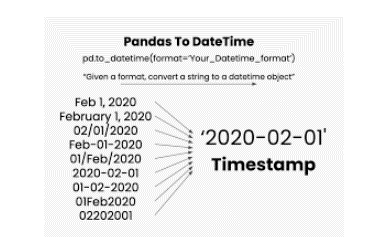

#### Missing Data Imputation

In [10]:
# Nan Vs None
print(type(np.nan))
print(type(None))

<class 'float'>
<class 'NoneType'>


In [11]:
# Usage of None
var = None
print(var)
print(type(var))
print(id(var))

None
<class 'NoneType'>
4335536232


In [12]:
import pandas as pd
s = pd.Series([3,None])
s

0    3.0
1    NaN
dtype: float64

The resulting Series contains a NaN instead of None. This is because Pandas automatically converted None to NaN given that the other value (3) is a numeric, which then allows the column type to be float64.

In [13]:
s = pd.Series(["3",None])
s

0       3
1    None
dtype: object

In [15]:
# Replace None with NaN in pandas dataframe
s.fillna(value=np.nan, inplace=True)
s

0      3
1    NaN
dtype: object

### Missing value imputations
Built in functions to  handle the missing data.
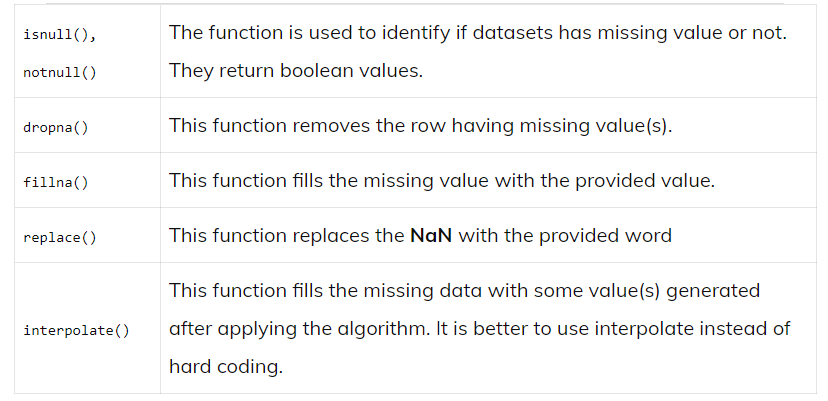

In [17]:
# Example-1
Data=pd.read_csv('Data.csv')
Data

,Part,Feature,Price
0,Monitor,LED,12.0
1,CPU,i7,3500.0
2,NaN,RGB,NaN
3,Mouse,Wireless,1200.0
4,NaN,Zebronics,NaN
5,Extensions,NaN,250.0
6,Table,Urban Clap,7000.0
7,Chair,Apex Chairs,12000.0
8,Wifi,Airtel,799.0


In [18]:
#isnull()
#returns True for all the missing values & False for all the occupied values.
Data.isnull()

,Part,Feature,Price
0,False,False,False
1,False,False,False
2,True,False,True
3,False,False,False
4,True,False,True
5,False,True,False
6,False,False,False
7,False,False,False
8,False,False,False


In [19]:
#notnull()
#returns True for all the occupied values and False for the missing value.
Data.notnull()

,Part,Feature,Price
0,True,True,True
1,True,True,True
2,False,True,False
3,True,True,True
4,False,True,False
5,True,False,True
6,True,True,True
7,True,True,True
8,True,True,True


In [20]:
#dropna()
#dropna removes the entire row having missing value
Data1=Data.dropna()
Data1

,Part,Feature,Price
0,Monitor,LED,12.0
1,CPU,i7,3500.0
3,Mouse,Wireless,1200.0
6,Table,Urban Clap,7000.0
7,Chair,Apex Chairs,12000.0
8,Wifi,Airtel,799.0


In [21]:
#Fillna
# replace nan to zero
Data3=Data['Price'].fillna(0)
Data3

0       12.0
1     3500.0
2        0.0
3     1200.0
4        0.0
5      250.0
6     7000.0
7    12000.0
8      799.0
Name: Price, dtype: float64

In [22]:
# isnull.sum
Data.isnull().sum()

Part       2
Feature    1
Price      2
dtype: int64

### Interpolation to fill missing values

Numerical columns only



In [24]:
#filling missing values using interpolate
#interpolte uses linear method to generate value
#pay attention to the values inplace of NaN

Data4=Data.interpolate(method='nearest')
print(Data)
Data4

         Part      Feature    Price
0     Monitor          LED     12.0
1         CPU           i7   3500.0
2         NaN          RGB      NaN
3       Mouse     Wireless   1200.0
4         NaN    Zebronics      NaN
5  Extensions          NaN    250.0
6       Table   Urban Clap   7000.0
7       Chair  Apex Chairs  12000.0
8        Wifi       Airtel    799.0


,Part,Feature,Price
0,Monitor,LED,12.0
1,CPU,i7,3500.0
2,NaN,RGB,3500.0
3,Mouse,Wireless,1200.0
4,NaN,Zebronics,1200.0
5,Extensions,NaN,250.0
6,Table,Urban Clap,7000.0
7,Chair,Apex Chairs,12000.0
8,Wifi,Airtel,799.0


#Example-2
There are more than one ways that can be considered before replacing missing values. Few of them are :
1. A constant value that has meaning within the domain, such as 0, distinct from all other values.
2. A value from another randomly selected record.
3. A mean, median, or mode value for the column.
4. Time series missing value Imputation

In [25]:
#importing the dataset into kaggle
df = pd.read_csv("train.csv")
df.columns

# 95% and above missing value columns can be removed

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# Remove missin columns
updated_df = df.dropna(axis=1)
updated_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

In [29]:
df.shape

(891, 12)

In [30]:
updated_df.shape

(891, 9)

In [31]:
# Remove only missig rows
updated_df1 = df.dropna(axis=0)
updated_df1.shape

(183, 12)

##### Filling the missing data with the mean or median value if it’s a numerical variable.
##### Filling the missing data with mode if it’s a categorical value

In [32]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

0

In [33]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [34]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
cols = ['Cabin','Embarked']
df[cols]=df[cols].fillna(df.mode().iloc[0])  
#df[cols]=df[cols].fillna(df.mode())

In [36]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Time series - Missing value Imputation


Time series is a sequence of observations recorded at regular time intervals. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time. 

Method 1 : backfill – bfill : according to the last observed value & forwardfill – ffill : according to the next observed value

Method 2 : Using Interpolate() Method

In [37]:
# there are four missing values
lst = [10001.0, 10002.0, 10003.0,10004.0, np.nan, np.nan, 10005.0, np.nan, 10000]
df = pd.DataFrame(lst)
df

,0
0,10001.0
1,10002.0
2,10003.0
3,10004.0
4,NaN
5,NaN
6,10005.0
7,NaN
8,10000.0


In [38]:
gfg1 = df.ffill()
# Filling forward
print("Using ffill() function:-")
print(gfg1)

Using ffill() function:-
         0
0  10001.0
1  10002.0
2  10003.0
3  10004.0
4  10004.0
5  10004.0
6  10005.0
7  10005.0
8  10000.0


In [39]:
# Filling backward
gfg2 = df.bfill()
print("Using bfill() function:-")
print(gfg2)

Using bfill() function:-
         0
0  10001.0
1  10002.0
2  10003.0
3  10004.0
4  10005.0
5  10005.0
6  10005.0
7  10000.0
8  10000.0


## Pandas Drop Duplicates
Removing duplicates is an essential skill to get accurate counts because you often don't want to count the same thing multiple times. 

#drop_duplicates.

In [40]:
Data=pd.read_csv("Iris.csv")

In [41]:
#Data=pd.read_csv("duplicate.csv")
Data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
Data.shape

(150, 5)

In [143]:
dup = Data.duplicated()
dup.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [57]:
# occurrence based on all columns
duplicate = Data[Data.duplicated()]

print("Duplicate Rows :")
print(len(duplicate))
duplicate

## Here only duplicated data is displayed (the first occurence is included in valid records)

Duplicate Rows :
11


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
104,4.9,3.1,1.5,0.1,Iris-setosa
105,5.4,3.7,1.5,0.2,Iris-setosa
106,4.8,3.4,1.6,0.2,Iris-setosa
107,4.8,3.0,1.4,0.1,Iris-setosa
108,4.3,3.0,1.1,0.1,Iris-setosa
109,5.8,4.0,1.2,0.2,Iris-setosa
110,5.7,4.4,1.5,0.4,Iris-setosa
111,5.4,3.9,1.3,0.4,Iris-setosa


In [144]:
# first occurence of these will be kept
pd.set_option('display.max_rows', None)


Data1= Data.drop_duplicates(keep='first')
print(Data1.shape)
#df.drop_duplicates()

(139, 5)


In [145]:
Data2= Data.drop_duplicates(keep='last')
print(Data2.shape)


(139, 5)


#### Descriptive statistics - Data Quality checks

- Measure the Central Tendancy and Disperson of the Data

In [60]:
# Dataset -fortune 500.csv The data set consists of revenue and profit figures of fortune 500 companies along with their rank.
data = 'Fortune500.csv'
df = pd.read_csv(data,encoding= 'unicode_escape')

In [61]:
df.head()

,Rank,Title,Website,Employees,Sector,Industry,Fullname,Revenues,Assets
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Wal-Mart Stores, Inc.",485873,198825
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),Berkshire Hathaway Inc.,223604,620854
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Apple, Inc.",215639,321686
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,Exxon Mobil Corporation,205004,330314
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,McKesson Corporation,192487,56563


In [62]:
df.shape

(500, 9)

In [63]:
df.isnull().sum()

Rank         0
Title        0
Website      0
Employees    0
Sector       0
Industry     0
Fullname     0
Revenues     0
Assets       0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       500 non-null    int64 
 1   Title      500 non-null    object
 2   Website    500 non-null    object
 3   Employees  500 non-null    int64 
 4   Sector     500 non-null    object
 5   Industry   500 non-null    object
 6   Fullname   500 non-null    object
 7   Revenues   500 non-null    int64 
 8   Assets     500 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 35.3+ KB


### Describe numerical columns [Descriptive Summary]

In [65]:
df.describe()

,Rank,Employees,Revenues,Assets
count,500.000000,5.000000e+02,500.000000,5.000000e+02
mean,250.492000,5.635013e+04,24111.748000,8.038934e+04
std,144.477366,1.234520e+05,38337.353337,2.704257e+05
min,1.000000,8.300000e+01,5145.000000,4.370000e+02
25%,125.750000,1.190000e+04,7245.000000,8.436500e+03
50%,250.500000,2.500000e+04,11384.000000,1.932450e+04
75%,375.250000,5.682525e+04,22605.250000,4.812600e+04
max,500.000000,2.300000e+06,485873.000000,3.287968e+06


### Describe categorical columns [Descriptive Summary]

In [67]:
df.describe(include= 'object' )

,Title,Website,Sector,Industry,Fullname
count,500,500,500,500,500
unique,500,499,21,73,500
top,Walmart,http://www.abbott.com,Financials,Utilities: Gas and Electric,"Wal-Mart Stores, Inc."
freq,1,2,84,22,1


### Computation of Measures of Central Tendency
1. Mean
2. Median
3. Mode

In [68]:
# Computation of measures of central tendency
# Mean
mean = df['Revenues'].mean()

print(mean)

24111.748


In [69]:
#median 
median = df['Revenues'].median()

print(median)

11384.0


In [70]:
# Mode
mode = df['Revenues'].mode()

print(mode)

0    9061
dtype: int64


### Significance of kde curve
Density curve is a summary of the distribution of data. It helps to see if there is a skew in data.

### Interpretation of below Density Curve

**Quantitative Check**<br>
Calculating, mean=24111.748 > median=11384.0, for Revenue column, hence +ve skew

**Qualitative Check**<br>
From its curve plot for revenue, we can see long tail towards right hence +ve skewed.

/Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


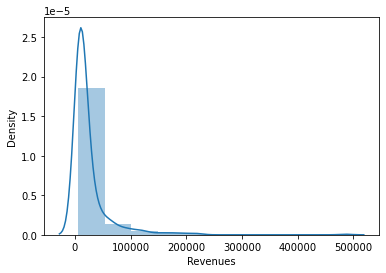

In [74]:
import seaborn as sns
data = df['Revenues']

sns.distplot(data, bins=10, hist=True, kde=True, label = 'Revenue');

- In Symmetrical Distributions, Mean = Median

- In Positive or right skewed distribution(long tail towards right), **mean is to right of median**.<br> Mean > Median > Mode

- In Negative or left skewed distribution (long tail towards left), **mean is to left of median** <br> Mean < Median < Mode


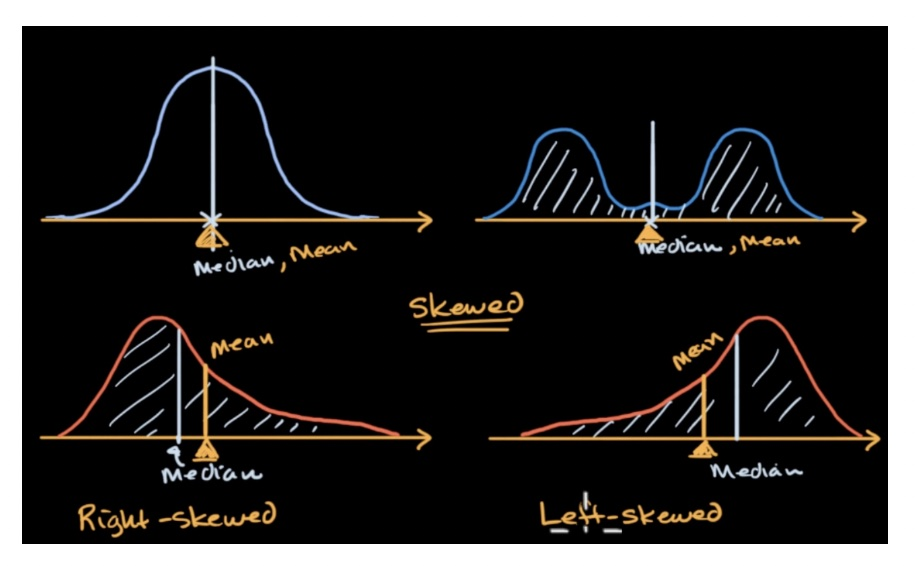

## Rule of Thumb for Skewness Values

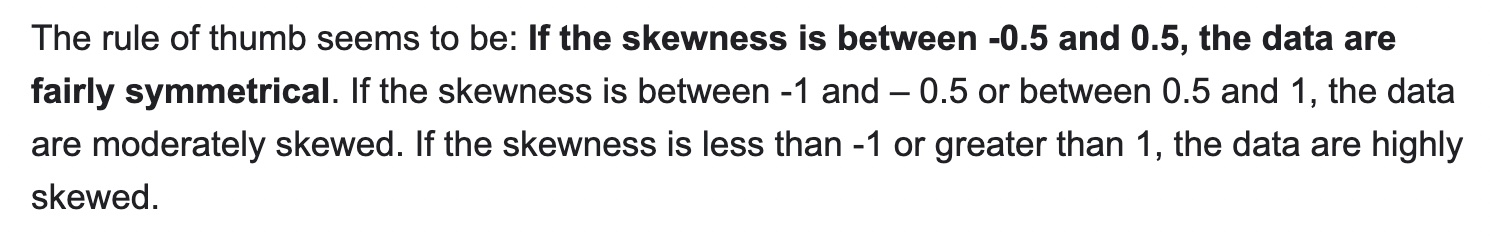

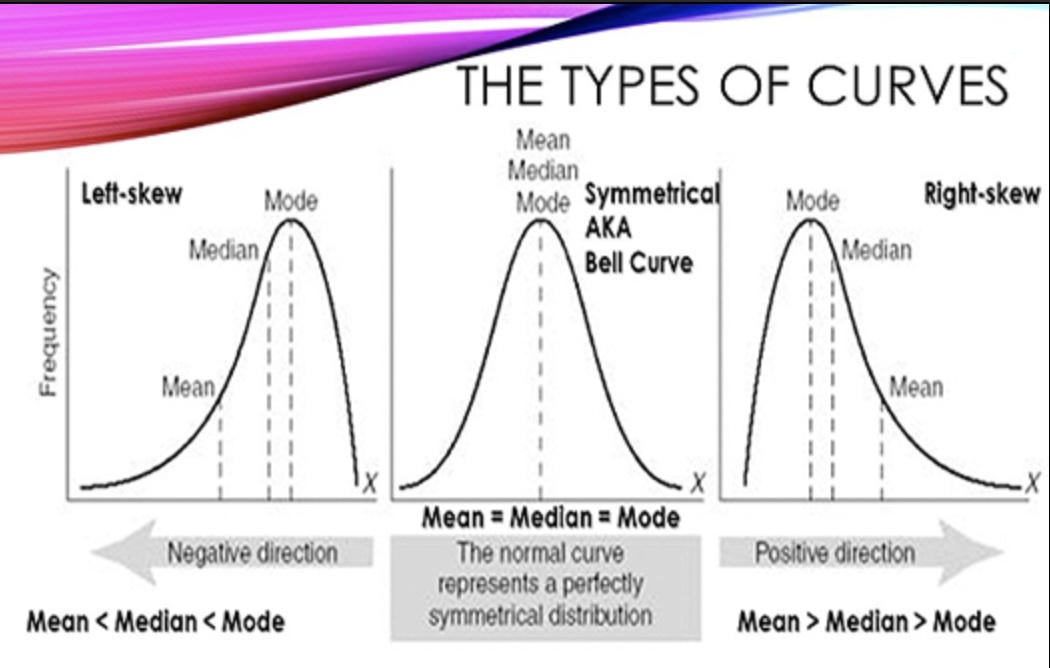

##### Understanding skewness of the data
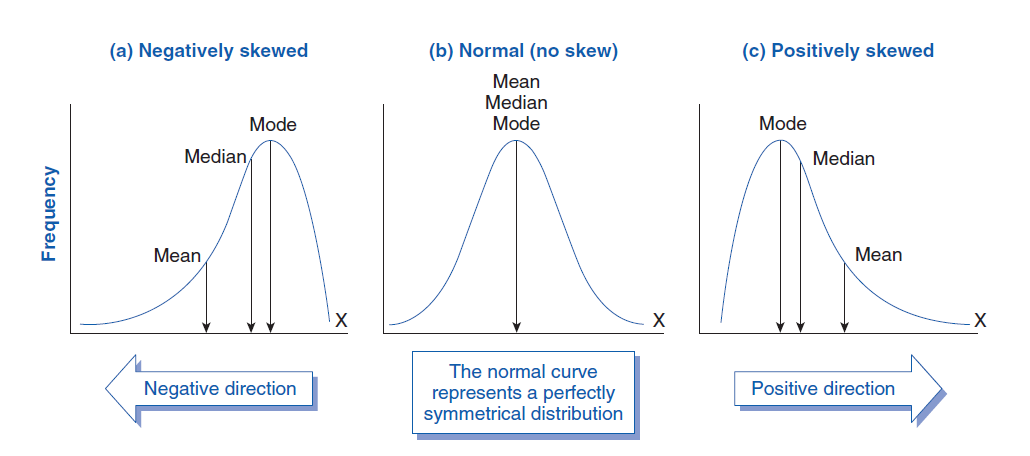

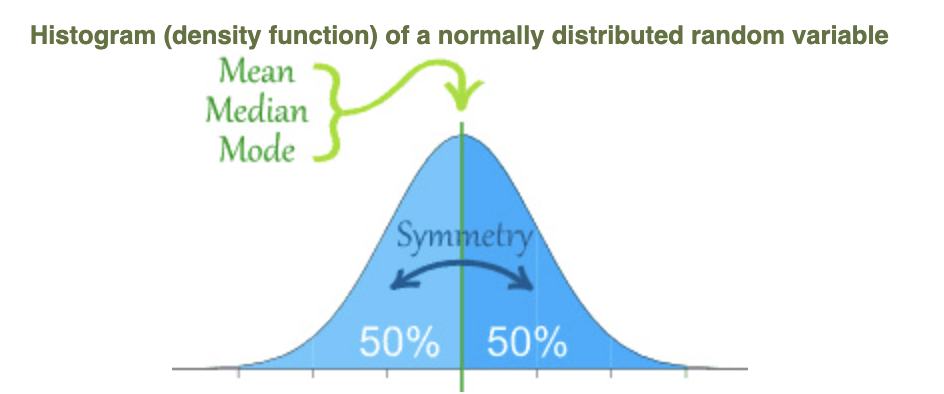

### Computation of measures of dispersion or variability

1. Minimum
2. Maximum
3. Range
4. Variance
5. Standard Deviation

In [76]:
# Minimum Value
print("Minimum values of Revenue is:", df['Revenues'].min())

# Maximum Value
print("Maximum  values of Revenue is:",df['Revenues'].max())

# Range
print("Range of Revenue is:",df['Revenues'].max() - df['Revenues'].min())

# Varience
print("Varience  of Revenue is:", df['Revenues'].var())

# SD
print("Standard deviation of Revenue is:", df['Revenues'].std())

Minimum values of Revenue is: 5145
Maximum  values of Revenue is: 485873
Range of Revenue is: 480728
Varience  of Revenue is: 1469752660.8501961
Standard deviation of Revenue is: 38337.35333653324


###### Equation of varience:
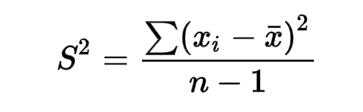

### Precentages, Percentiles and Quartiles

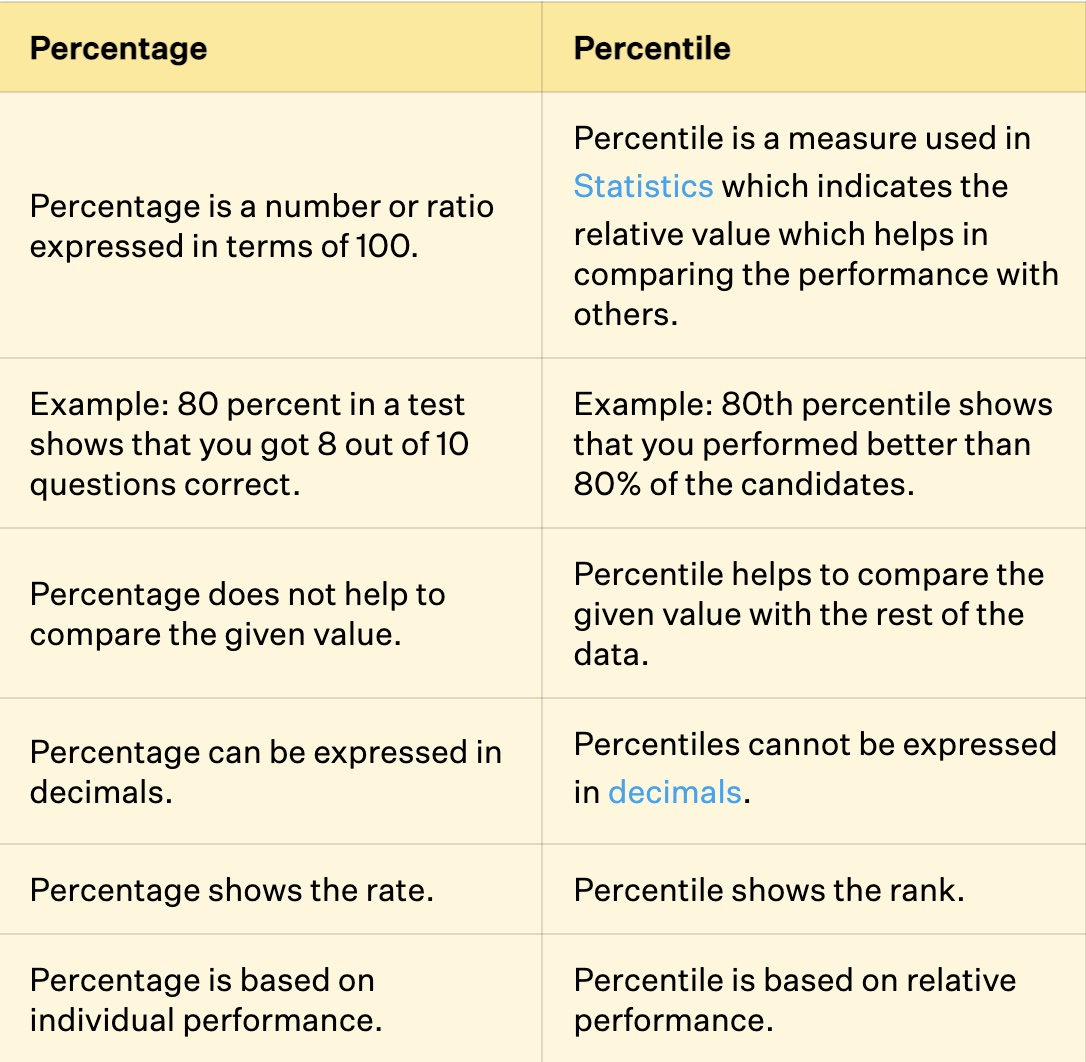

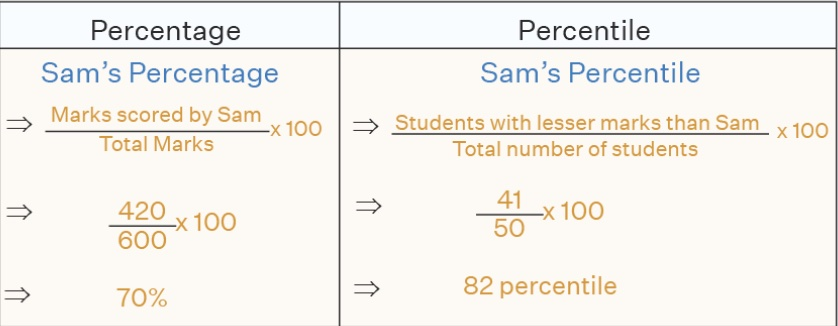

### Relationship b/w Percentile and Quartiles

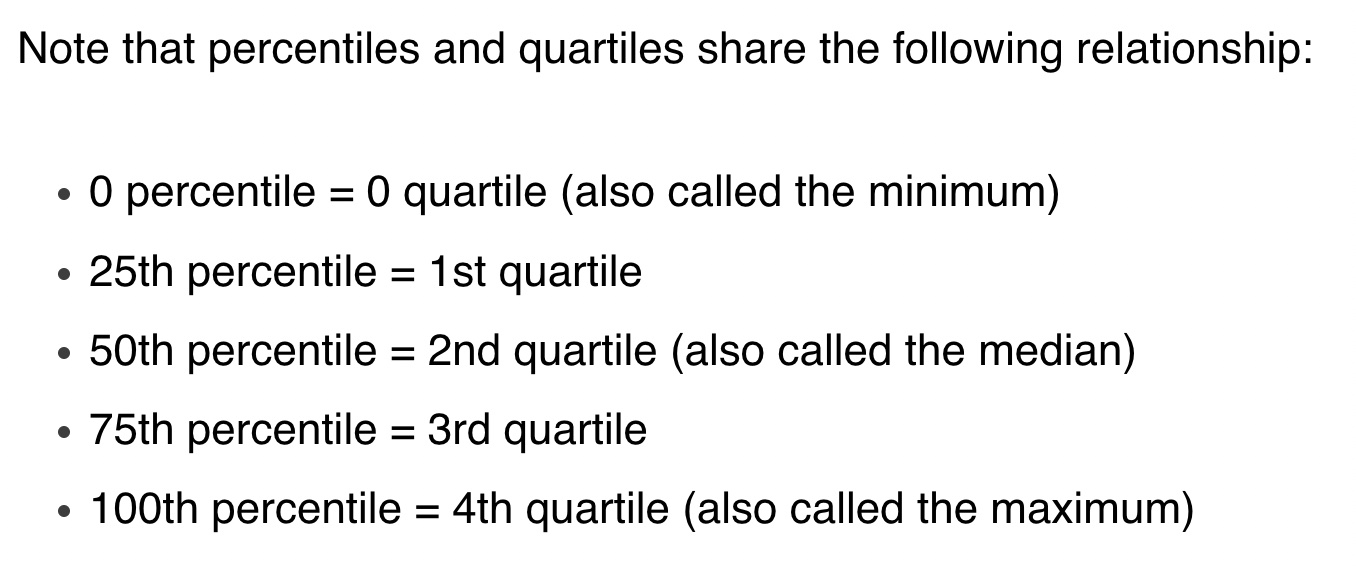

In [78]:
# Percentiles
# percentage of values in a set of data that fall below a given value
# percentile is the per cent of values below a specific value

#First Quartile
Q1 = df['Revenues'].quantile(0.25)
print("Q1 of Revenue is:", Q1)

#Second Quartile
Q2 = df['Revenues'].quantile(0.5)
print("Q2 of Revenue is:",Q2)

#Third
Q3 = df['Revenues'].quantile(0.75)
print("Q3 of Revenue is:",Q3)

#first quartile has 25% of the data below it
#2nd quartile = median has 50% of data below it
#third quartile has 75% data below and 25% above. 
#A fourth quartile would be the maximum

IQR = Q3  - Q1
print("IQR of Revenue is:",IQR)

Q1 of Revenue is: 7245.0
Q2 of Revenue is: 11384.0
Q3 of Revenue is: 22605.25
IQR of Revenue is: 15360.25


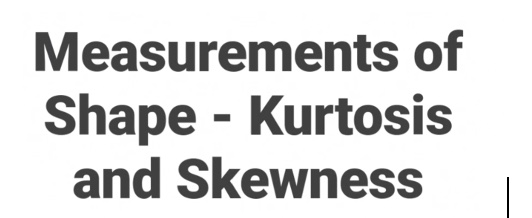

In [77]:
# Computation of measures of shape of distribution

# 1. Skewness
print("skewness value of revenue is:", df['Revenues'].skew())
# skewness=1 for normal distribution; more positive skewness in this case


# 2. Kurtosis

print("Kurtosis value of revenue is:",df['Revenues'].kurt())

# it is greater than 3 and so excess kurtosis > 0. 
#Hence, we can conclude that the Revenue  curve is a leptokurtic curve

skewness value of revenue is: 5.480066970305041
Kurtosis value of revenue is: 47.58795634430753


#### Kurtosis Reference :
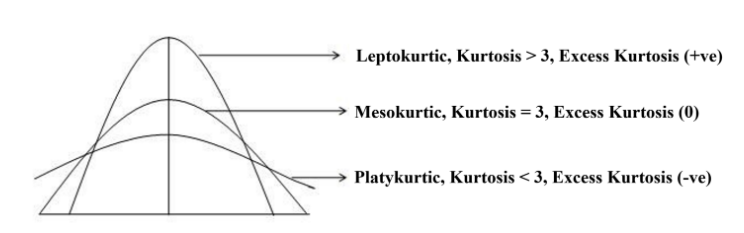

#### Skewness Reference

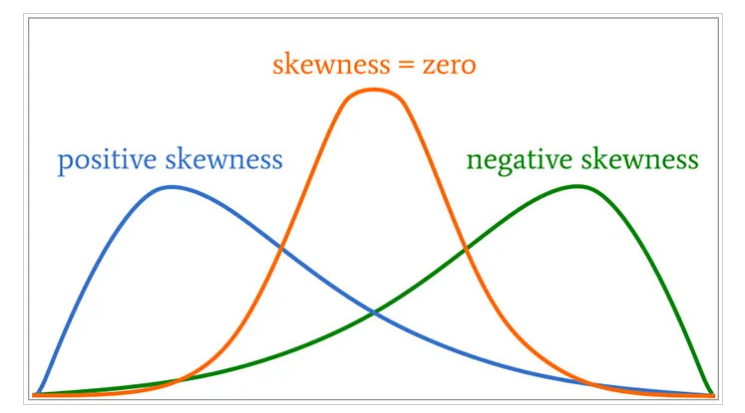

##### Equations for reference: 

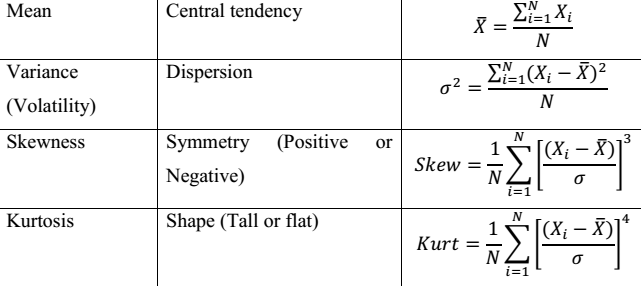

### Detect & Remove ouliers from the Dataset

In data analysis transformation is the replacement of a variable by a function of that variable: for example, replacing a variable x by the square root of x or the logarithm of x. 

The idea behind these transformations is to get data close to normal distribution. It is a kind of Quality check in terms of statistics.

### Question - How to handle 0 value in case taking log transformation?

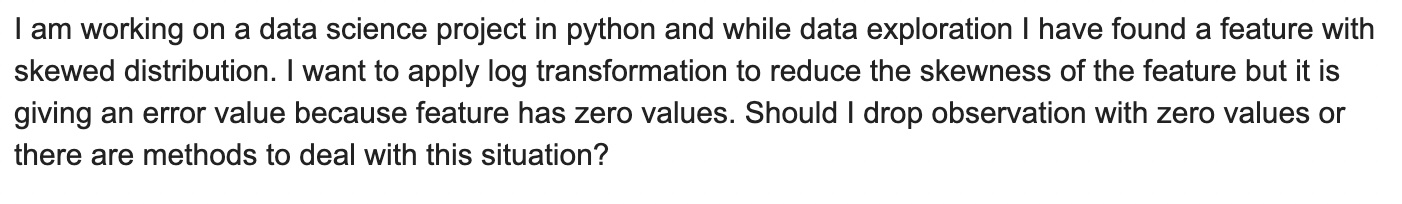

### Solution

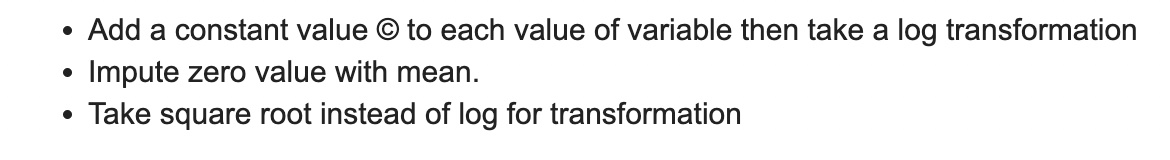

### How to handle/treat outliers?

By converting kurtosis or skewed data to close to normal distribution by taking mathematical trasformations.

**What is An Outlier?**

Outlier is an untypical observed data point in a given distribution of data points.

An outlier can be easily defined and visualized using a box-plot 

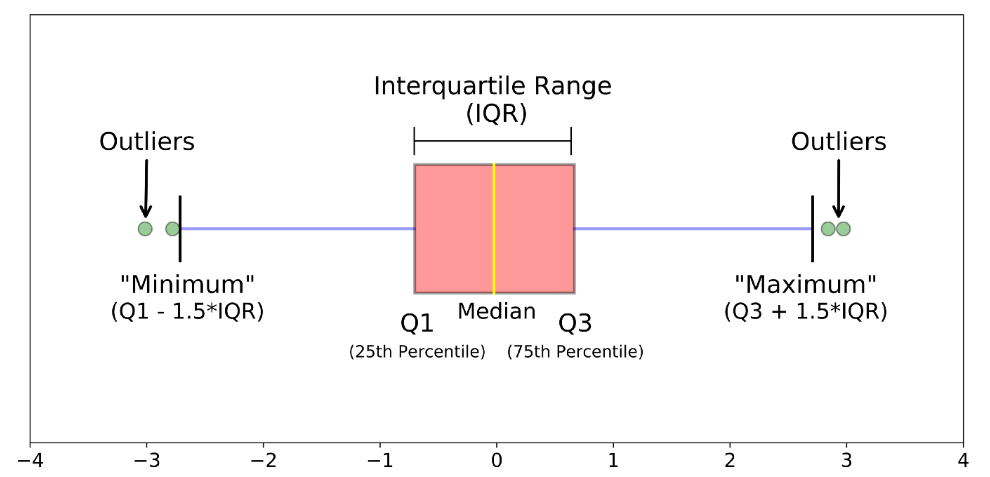

### The 5 Number Summary for Boxplot

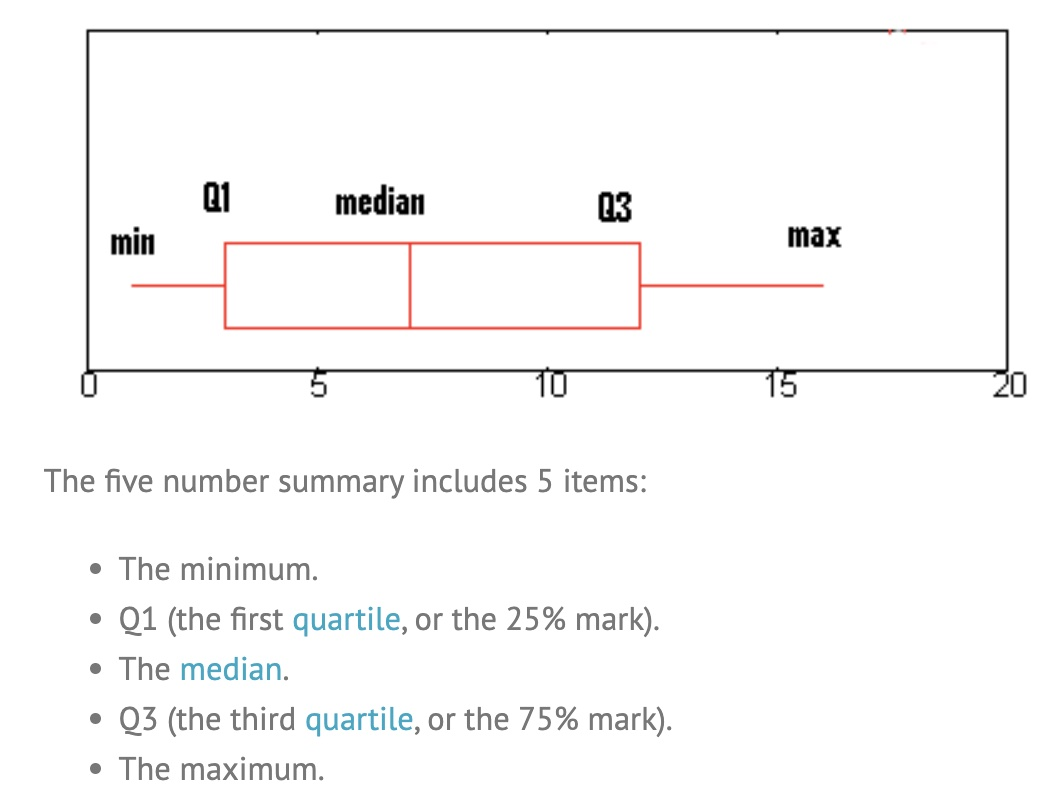

In [79]:
# Practical example-1
diamonds = pd.read_csv("diamonds.csv")
diamonds.head()
diamonds=diamonds.dropna()
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [83]:
diamonds['carat'].head(n=10)

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
5    0.24
6    0.24
7    0.26
8    0.22
9    0.23
Name: carat, dtype: float64

In [89]:
diamonds.shape

(53940, 10)

In [90]:
# Filter rows where carat value > 2

x = diamonds[diamonds['carat'] > 2]
len(x)

1889

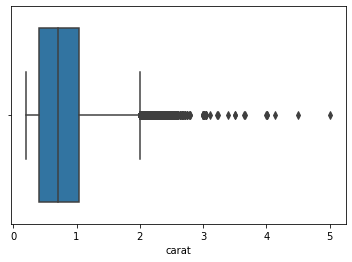

In [87]:
import matplotlib.pyplot as plt
sns.boxplot(x=diamonds['carat'])
plt.show()
#this column has outliers (it is shown at boxplot)

In [93]:
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [94]:
diamonds.describe(include= 'object' )

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [95]:
df_carat_log=np.log(diamonds['carat'])
df_carat_log.head()

0   -1.469676
1   -1.560648
2   -1.469676
3   -1.237874
4   -1.171183
Name: carat, dtype: float64

**We observe that after taking log transformation, outliers in boxplot have reduced**

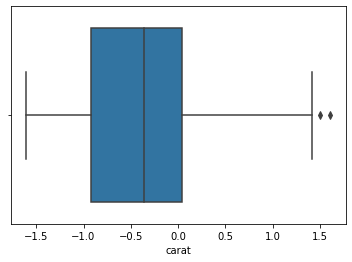

In [96]:
sns.boxplot(x=df_carat_log)
plt.show()

In [98]:
# # Practical example-2
data = pd.read_csv('employees_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [107]:
data['MonthlyIncome'].skew()

1.3698166808390662

<AxesSubplot:ylabel='MonthlyIncome'>

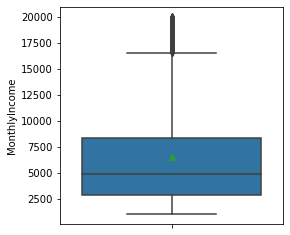

In [104]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, y='MonthlyIncome',showmeans=True)

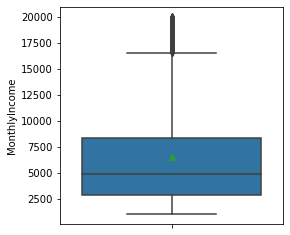

In [105]:
# if data parameter not speficied, speify full column name
plt.figure(figsize=(4,4))
sns.boxplot(y=data['MonthlyIncome'],showmeans=True);

In [103]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [108]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

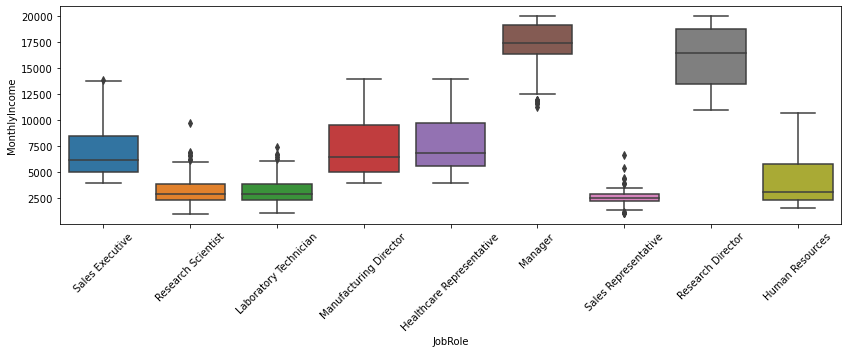

In [109]:
plt.figure(figsize=(14,4))
sns.boxplot(data=data, x='JobRole', y='MonthlyIncome')
plt.xticks(rotation=45)
plt.show()

In [116]:
sales_rep = data[data['JobRole'] == 'Sales Representative']
q1 = sales_rep['MonthlyIncome'].quantile(0.25)
q3 = sales_rep['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr
print('q1',q1)
print('q3',q3)
print('lower whisker',lw)
print('upper whisker',uw)


q1 2250.0
q3 2878.5
lower whisker 1307.25
upper whisker 3821.25


In [117]:
# 1st & 3rd quartile can directly get from decribe()


#q1 = sales_rep['MonthlyIncome'].quantile(0.25)
sales_rep['MonthlyIncome'].describe()

count      83.000000
mean     2626.000000
std       854.534419
min      1052.000000
25%      2250.000000
50%      2579.000000
75%      2878.500000
max      6632.000000
Name: MonthlyIncome, dtype: float64

In [112]:
sales_outliers = sales_rep[(sales_rep['MonthlyIncome'] < lw) | (sales_rep['MonthlyIncome'] > uw)]
sales_outliers

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
238,32,0,Travel_Rarely,1401,Sales,4,2,Life Sciences,1,330,...,1,80,1,6,5,3,4,3,1,2
301,18,0,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,1,80,0,0,2,3,0,0,0,0
539,50,0,Travel_Rarely,316,Sales,8,4,Marketing,1,738,...,4,80,1,4,2,3,2,2,2,2
564,45,0,Travel_Rarely,954,Sales,2,2,Technical Degree,1,783,...,1,80,0,9,3,3,8,7,3,1
764,28,0,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,...,2,80,0,1,5,3,1,0,0,0
911,25,1,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,...,4,80,0,1,4,3,1,0,1,0
1021,25,1,Travel_Rarely,383,Sales,9,2,Life Sciences,1,1439,...,1,80,0,6,2,3,3,2,2,2
1220,36,0,Travel_Rarely,530,Sales,2,4,Life Sciences,1,1710,...,3,80,0,17,2,2,13,7,6,7
1308,38,0,Travel_Rarely,723,Sales,2,4,Marketing,1,1835,...,1,80,2,20,4,2,4,2,0,3
1338,30,1,Travel_Rarely,945,Sales,9,3,Medical,1,1876,...,3,80,0,1,3,2,1,0,0,0


In [113]:
sales_outliers.index.tolist()

[238, 301, 539, 564, 764, 911, 1021, 1220, 1308, 1338, 1365]

#### Below is a Pandas PLot (plotted directly using dataframe column named MonthlyIncome)

Other options are Matplotlib(Implicit method) and Object Oriented(Explicit method).

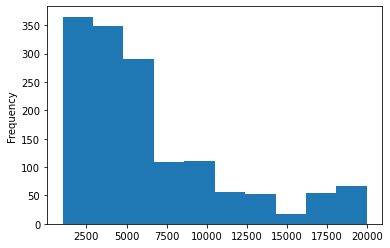

In [115]:
data.MonthlyIncome.plot.hist();

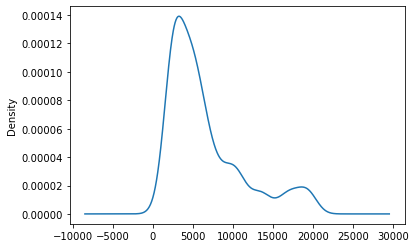

In [119]:
data.MonthlyIncome.plot.kde();

In [120]:
data.MonthlyIncome.skew()

1.3698166808390662

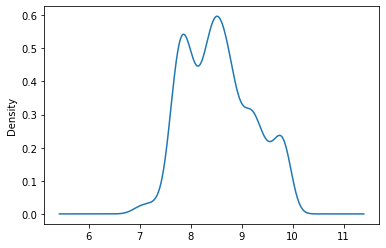

In [122]:
#np.log(data.MonthlyIncome).plot.kde()
DATA=np.log(data.MonthlyIncome)
DATA.plot.kde();

In [123]:
np.log(data.MonthlyIncome).skew()

0.2861922926389174

In [124]:
np.timedelta64

numpy.timedelta64

### Binning or Bucketing of columns 

Activity:
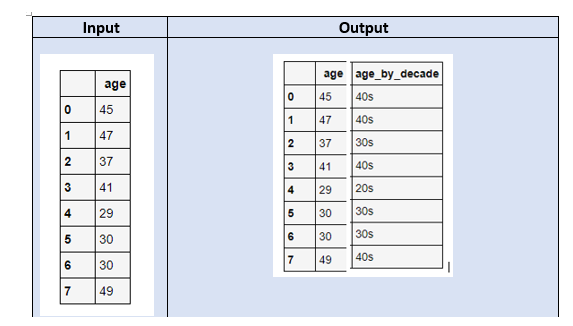

In [133]:
# Binning of numerical columns
# segment and sort data values into bins

df_ages = pd.DataFrame({'age': [45,47,37,41,29,49,34]})
df_ages

,age
0,45
1,47
2,37
3,41
4,29
5,49
6,34


bins=4 in below scenario calculated using (49-29)/4 = 5, so interval of 5 starting from minimum value which is 29.<br>
29-34,
34-39,
39-44,
44-49<br>

Note brackets '(' and ']' in output.

In [134]:
df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=4)
df_ages

,age,age_by_decade
0,45,"(44.0, 49.0]"
1,47,"(44.0, 49.0]"
2,37,"(34.0, 39.0]"
3,41,"(39.0, 44.0]"
4,29,"(28.98, 34.0]"
5,49,"(44.0, 49.0]"
6,34,"(28.98, 34.0]"


In [135]:
df_ages['age_bins'] = pd.cut(x=df_ages['age'], bins=[20,30,40,50])
df_ages

,age,age_by_decade,age_bins
0,45,"(44.0, 49.0]","(40, 50]"
1,47,"(44.0, 49.0]","(40, 50]"
2,37,"(34.0, 39.0]","(30, 40]"
3,41,"(39.0, 44.0]","(40, 50]"
4,29,"(28.98, 34.0]","(20, 30]"
5,49,"(44.0, 49.0]","(40, 50]"
6,34,"(28.98, 34.0]","(30, 40]"


In [136]:
df_ages['age_bins'] = pd.cut(x=df_ages['age'], bins=[19,29,39, 49])
df_ages

,age,age_by_decade,age_bins
0,45,"(44.0, 49.0]","(39, 49]"
1,47,"(44.0, 49.0]","(39, 49]"
2,37,"(34.0, 39.0]","(29, 39]"
3,41,"(39.0, 44.0]","(39, 49]"
4,29,"(28.98, 34.0]","(19, 29]"
5,49,"(44.0, 49.0]","(39, 49]"
6,34,"(28.98, 34.0]","(29, 39]"


In [138]:
df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=[19,29,39, 49], labels=['20s', '30s', '40s'])

In [139]:
df_ages

,age,age_by_decade,age_bins
0,45,40s,"(39, 49]"
1,47,40s,"(39, 49]"
2,37,30s,"(29, 39]"
3,41,40s,"(39, 49]"
4,29,20s,"(19, 29]"
5,49,40s,"(39, 49]"
6,34,30s,"(29, 39]"


In [140]:
df_ages[['age','age_by_decade']]

,age,age_by_decade
0,45,40s
1,47,40s
2,37,30s
3,41,40s
4,29,20s
5,49,40s
6,34,30s


In [141]:
#Example np.digitize
x=[1990,1975,2004,1995,2005,2011,2010]
year_bins=[1990,2000,2010]
np.digitize(x,bins=year_bins)

array([1, 0, 2, 1, 2, 3, 3])

In [ ]:
# End 